In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from scipy.signal import argrelextrema

In [2]:
ast_df_list = [pd.read_csv('kirkout/kirk_gap_lab_' + str(i) + '.csv', header=None) for i in range(0, 10)]

In [3]:
print(ast_df_list[0].shape)
cur_pos_indices = []
for i in range(100):
    for j in range(29):
        cur_pos_indices.append(int(ast_df_list[0].shape[0] / 100) * (i + 1) - 1 - j)

(2809600, 2)


In [4]:
print(cur_pos_indices)

[28095, 28094, 28093, 28092, 28091, 28090, 28089, 28088, 28087, 28086, 28085, 28084, 28083, 28082, 28081, 28080, 28079, 28078, 28077, 28076, 28075, 28074, 28073, 28072, 28071, 28070, 28069, 28068, 28067, 56191, 56190, 56189, 56188, 56187, 56186, 56185, 56184, 56183, 56182, 56181, 56180, 56179, 56178, 56177, 56176, 56175, 56174, 56173, 56172, 56171, 56170, 56169, 56168, 56167, 56166, 56165, 56164, 56163, 84287, 84286, 84285, 84284, 84283, 84282, 84281, 84280, 84279, 84278, 84277, 84276, 84275, 84274, 84273, 84272, 84271, 84270, 84269, 84268, 84267, 84266, 84265, 84264, 84263, 84262, 84261, 84260, 84259, 112383, 112382, 112381, 112380, 112379, 112378, 112377, 112376, 112375, 112374, 112373, 112372, 112371, 112370, 112369, 112368, 112367, 112366, 112365, 112364, 112363, 112362, 112361, 112360, 112359, 112358, 112357, 112356, 112355, 140479, 140478, 140477, 140476, 140475, 140474, 140473, 140472, 140471, 140470, 140469, 140468, 140467, 140466, 140465, 140464, 140463, 140462, 140461, 140460

In [5]:
ast_df_merged = pd.concat(ast_df_list, ignore_index=True, axis=0)

In [6]:
display(ast_df_merged)

,0,1
0,2.686157,1.944660
1,3.218455,0.720069
2,3.187803,0.178743
3,3.006636,0.898475
4,1.888356,3.106301
...,...,...
28095995,0.027364,1.826267
28095996,-1.850171,-0.501305
28095997,1.071045,-1.325492
28095998,0.343388,1.758097


Number of years: 4999.990417522245


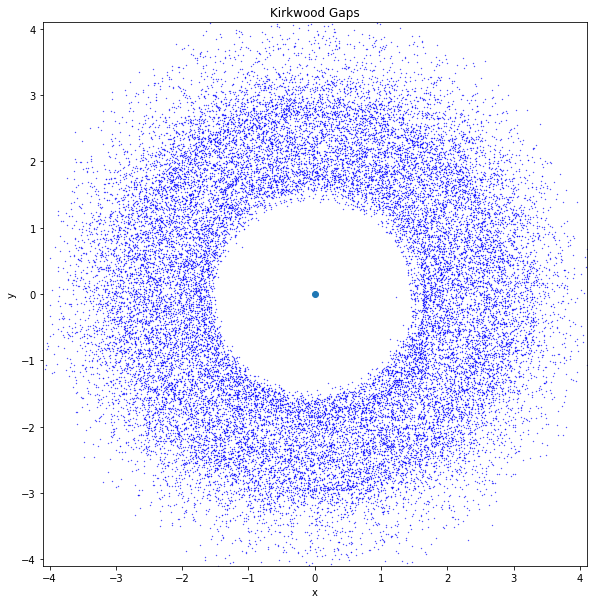

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
time = 280961
year = 365.25 * 24 * 60 * 60
step_size = 6.5 * 24 * 60 * 60
steps_per_year = year / step_size
print(f"Number of years: {time / steps_per_year}")
stop = int(year * 1000000/ (6.5 * 24 * 60 * 60))
for ast_df in ast_df_list:
    ax.scatter(ast_df.iloc[cur_pos_indices, 0], ast_df.iloc[cur_pos_indices, 1], s=0.1, color='blue')
ax.scatter(0.0, 0.0)
ax.scatter(778.479e9 * 6.68459e-12, 0.0)
ax.set_aspect('equal')
ax.set_xlim(-4.1, 4.1)
ax.set_ylim(-4.1, 4.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Kirkwood Gaps')
plt.show()

In [8]:
semi_major_axes = []
for ast_df in ast_df_list:
    semi_major_axes.extend(np.sqrt(np.array(ast_df.iloc[cur_pos_indices, 0]) ** 2 + np.array(ast_df.iloc[cur_pos_indices, 1]) ** 2))

In [9]:
print(semi_major_axes)

[2.638669362493528, 3.633276918567039, 3.9074824071455523, 3.7323431378864793, 3.647395712225291, 3.504210654947559, 3.415963023097293, 3.531627241566501, 3.685452614651724, 3.6590809037028356, 3.003431902678168, 2.357441042148881, 3.294736761937706, 3.8015972620952367, 3.7542584923882107, 3.5975518868215093, 3.452365355311144, 3.501986452170396, 3.666562866171123, 3.7886418577345102, 3.875641334058145, 3.4017572444738247, 2.4014142240763565, 2.8799200059399985, 3.5055015059681547, 3.527840894660784, 3.4029322208391104, 3.382419886839286, 3.4994617567986084, 3.214200436533293, 2.7333983572960965, 3.1422244452535533, 2.8378415198427223, 2.96487205368772, 3.009458152400528, 2.771355577777958, 3.166590746019833, 2.6848913436810604, 3.2176337180421886, 2.7479928375774563, 3.129651411037977, 2.8752772148164585, 2.9243417196463204, 3.007245956642722, 2.7106830546123537, 3.1360140042071305, 2.6612305702212278, 3.1929858262204984, 2.767136736663434, 3.1235027384712963, 2.917106086496341, 2.939

In [10]:
semi_major_axes_np = np.array(semi_major_axes)
semi_major_axes_np = semi_major_axes_np[semi_major_axes_np < 6.0]
print(len(semi_major_axes_np))

28043


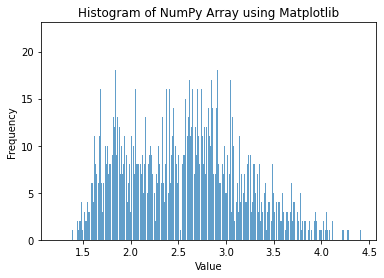

In [11]:
plt.hist(semi_major_axes_np, bins=5000, alpha=0.7, rwidth=0.85)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of NumPy Array using Matplotlib')
plt.show()

<AxesSubplot:ylabel='Density'>

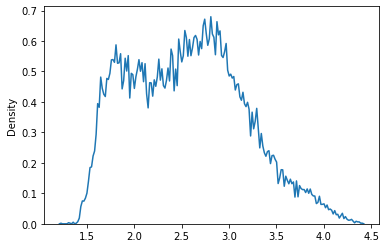

In [12]:
sns.kdeplot(semi_major_axes_np, bw_adjust=0.05)

In [13]:
tolerance = 0.1
uniq, count = np.unique(np.round(semi_major_axes_np / tolerance) * tolerance, return_counts=True)

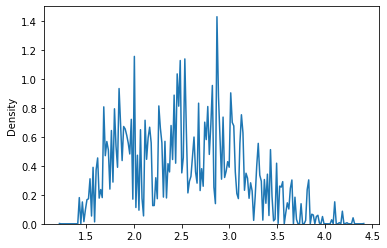

In [14]:
kde_curve = sns.kdeplot(semi_major_axes_np, bw_adjust=0.001).get_lines()[0].get_data()

# Extract the x and y coordinates of the KDE curve
x_kde, y_kde = kde_curve

# Find local minima using the argrelextrema function
local_minima_indices = argrelextrema(y_kde, np.less)[0]
local_minima_x = x_kde[local_minima_indices]
local_minima_y = y_kde[local_minima_indices]

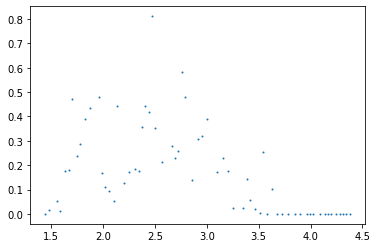

In [15]:
plt.scatter(local_minima_x, local_minima_y, s=1)

In [16]:
np.sort(local_minima_x)

array([1.44419725, 1.47626852, 1.55644671, 1.58851798, 1.63662489,
       1.66869617, 1.70076744, 1.74887436, 1.78094563, 1.82905254,
       1.87715945, 1.95733764, 1.98940892, 2.02148019, 2.05355147,
       2.10165838, 2.13372965, 2.1978722 , 2.24597911, 2.31012166,
       2.34219294, 2.37426421, 2.40633549, 2.43840676, 2.47047804,
       2.50254931, 2.56669186, 2.66290569, 2.69497696, 2.72704823,
       2.75911951, 2.79119078, 2.85533333, 2.91947588, 2.95154716,
       2.99965407, 3.09586789, 3.16001044, 3.20811736, 3.25622427,
       3.35243809, 3.38450937, 3.41658064, 3.46468755, 3.51279447,
       3.54486574, 3.57693701, 3.62504393, 3.67315084, 3.72125775,
       3.7854003 , 3.84954285, 3.89764976, 3.96179231, 3.99386359,
       4.02593486, 4.09007741, 4.13818432, 4.1702556 , 4.20232687,
       4.25043378, 4.28250506, 4.31457633, 4.34664761, 4.37871888])

In [17]:
possible_gap = local_minima_x[local_minima_y < 0.2]

In [18]:
print(local_minima_x[np.argsort(local_minima_y)])

[4.37871888 4.31457633 4.1702556  4.34664761 3.84954285 4.28250506
 4.25043378 4.02593486 4.09007741 4.13818432 4.20232687 3.99386359
 3.7854003  3.72125775 1.44419725 3.57693701 3.67315084 3.96179231
 3.89764976 3.51279447 1.58851798 1.47626852 3.46468755 3.25622427
 3.35243809 1.55644671 2.10165838 3.41658064 2.05355147 3.62504393
 2.02148019 2.1978722  2.85533333 3.38450937 1.98940892 2.24597911
 3.09586789 3.20811736 1.63662489 2.34219294 1.66869617 2.31012166
 2.56669186 2.69497696 3.16001044 1.74887436 3.54486574 2.72704823
 2.66290569 1.78094563 2.91947588 2.95154716 2.50254931 2.37426421
 1.82905254 2.99965407 2.43840676 1.87715945 2.40633549 2.13372965
 1.70076744 2.79119078 1.95733764 2.75911951 2.47047804]
